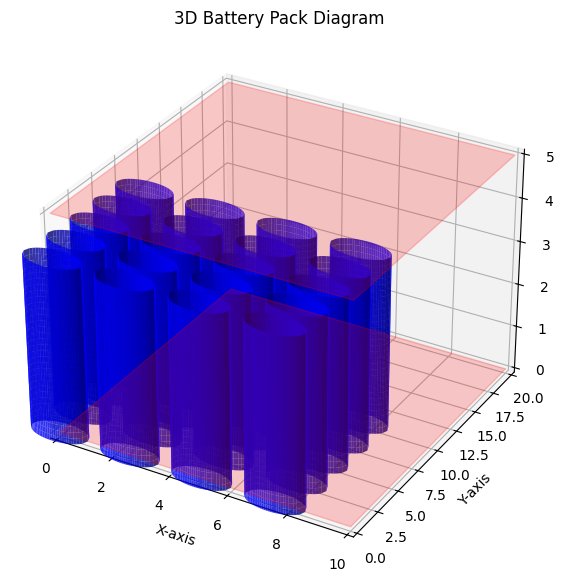

In [1]:
# Install matplotlib if not already installed
!pip install matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Battery Pack Dimensions
width = 10  # width of the pack
length = 20  # length of the pack
height = 5   # height of the pack

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot Battery Cells as Cylinders
def plot_cylinder(ax, center, radius, height, color):
    x = np.linspace(-radius, radius, 30)
    z = np.linspace(0, height, 30)
    X, Z = np.meshgrid(x, z)
    Y = np.sqrt(radius**2 - X**2)

    # Plot the top and bottom
    ax.plot_surface(center[0] + X, center[1] + Y, center[2] + Z, color=color, alpha=0.8)
    ax.plot_surface(center[0] + X, center[1] - Y, center[2] + Z, color=color, alpha=0.8)

# Arrange battery cells
cell_radius = 1
cell_height = 4
rows, cols = 4, 5
for i in range(rows):
    for j in range(cols):
        plot_cylinder(ax, center=(i * 2.5, j * 2.5, 0), radius=cell_radius, height=cell_height, color='blue')

# Plot the Protective Casing
verts = [
    [(0, 0, 0), (width, 0, 0), (width, length, 0), (0, length, 0)],  # Bottom
    [(0, 0, height), (width, 0, height), (width, length, height), (0, length, height)],  # Top
]
ax.add_collection3d(Poly3DCollection(verts, alpha=0.2, color='red'))

# Labels and Annotations
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Battery Pack Diagram')
ax.set_xlim([0, width])
ax.set_ylim([0, length])
ax.set_zlim([0, height])

plt.show()
